**# Data Understanding and Pre-processing**

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the datasets
with open(r'/content/yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
  BusinessDataset = pd.read_json(f, lines=True)


In [3]:
import json

# Load the Yelp tip dataset line by line, expecting multiple JSON objects
tips_data = []
with open('/content/yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as file:
    for line in file:
        try:
            tips_data.append(json.loads(line))  # Load each line as a separate JSON object
        except json.JSONDecodeError as e:
            print(f"Error decoding line: {e}")  # Handle potential errors gracefully

# Now `tips_data` should be a list of individual tip objects.
print(tips_data[:2])

Error decoding line: Unterminated string starting at: line 1 column 83 (char 82)
[{'user_id': 'AGNUgVwnZUey3gcPCJ76iw', 'business_id': '3uLgwr0qeCNMjKenHJwPGQ', 'text': 'Avengers time with the ladies.', 'date': '2012-05-18 02:17:21', 'compliment_count': 0}, {'user_id': 'NBN4MgHP9D3cw--SnauTkA', 'business_id': 'QoezRbYQncpRqyrLH6Iqjg', 'text': 'They have lots of good deserts and tasty cuban sandwiches', 'date': '2013-02-05 18:35:10', 'compliment_count': 0}]


In [4]:
#preview the two dataset
BusinessDataset.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
import pandas as pd  # Make sure pandas is imported

# ... (your existing code to load tips_data) ...

# Convert the list of dictionaries to a Pandas DataFrame
tips_df = pd.DataFrame(tips_data)

# Now you can use .head() on the DataFrame
tips_df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [6]:
# Merge the two dataframe
merged_df = pd.merge(BusinessDataset, tips_df, left_on='business_id', right_on='business_id', how='inner')
merged_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",trf3Qcz8qvCDKXiTgjUcEg,Dropping off my Amazon return.,2011-12-12 23:30:26,0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",_5swqa5xUdLar-Q-bBZSDA,Containers!,2012-03-29 18:47:55,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oAvO0BOHOagOI7WVGXlWSA,This place looks the same as other target at c...,2012-12-11 02:50:41,0
3,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",moSLKqdFUI-B80vun67UfQ,"clean just stopped for some pens, not to busy ...",2014-09-21 23:01:02,0
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",8eC6EOsLTmfVk_35t3ZQqg,Butterball turkeys are 99 cents a pound right ...,2013-11-23 21:15:05,0


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530794 entries, 0 to 530793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       530794 non-null  object 
 1   name              530794 non-null  object 
 2   address           530794 non-null  object 
 3   city              530794 non-null  object 
 4   state             530794 non-null  object 
 5   postal_code       530794 non-null  object 
 6   latitude          530794 non-null  float64
 7   longitude         530794 non-null  float64
 8   stars             530794 non-null  float64
 9   review_count      530794 non-null  int64  
 10  is_open           530794 non-null  int64  
 11  attributes        522391 non-null  object 
 12  categories        530768 non-null  object 
 13  hours             491059 non-null  object 
 14  user_id           530794 non-null  object 
 15  text              530794 non-null  object 
 16  date              53

In [8]:
# Checking for only columns with restaurant in categories

restaurant_df = merged_df[merged_df['categories'].str.contains('Restaurants', na=False)]
restaurant_df.head(50)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
8,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",WqeE5e5ROfaVEgkb9dAkiQ,Love their pastries and drinks!,2017-09-20 17:00:27,0
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",dQDt0l5e9sre54eG7plUdA,Really good egg tart and bubble tea. Best we ...,2013-06-17 17:28:26,0
10,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",jmCga_DqsGhzSz0KnWSelQ,Was told they stopped making almond tarts... U...,2015-04-25 12:54:25,0
11,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",lpnI226_ekGGvkx2Kd-biQ,After 6 pm the bread is on sale!,2016-05-11 20:09:04,0
12,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",GfOYE8ChRLVT9izL6UXMNA,Best steamed pork bun in chinatown!,2017-12-13 17:48:19,0
13,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",WXYMAOL1I-Ln6Mgp2AgY0A,great cupcakes & almond cookies,2016-03-06 13:57:22,0
14,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",6kJFLAHV-tNsBEZaRTqEWQ,Order the rainbow cake it's pretty and not too...,2018-11-18 22:51:16,0
15,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",OyjJWNmlky-Ase9ov1Pq5Q,bun is sucked here and the waitress was really...,2018-12-07 02:22:02,0
16,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",plFnLDCBdkfTpc4v0zCKiA,I found chilled pork buns that I could take ho...,2021-02-21 13:18:57,0
17,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",ZnGIEODjnJ7MlvxCSNaiZw,Love sonic but orders are constantly wrong...,2015-10-20 08:49:57,0


In [9]:
restaurant_df['name'].unique()

array(['St Honore Pastries', 'Sonic Drive-In', "Tsevi's Pub And Grill",
       ..., 'Bittercreek Alehouse', 'Adelita Taqueria & Restaurant',
       'West Side Kebab House'], dtype=object)

In [10]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367927 entries, 8 to 530789
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       367927 non-null  object 
 1   name              367927 non-null  object 
 2   address           367927 non-null  object 
 3   city              367927 non-null  object 
 4   state             367927 non-null  object 
 5   postal_code       367927 non-null  object 
 6   latitude          367927 non-null  float64
 7   longitude         367927 non-null  float64
 8   stars             367927 non-null  float64
 9   review_count      367927 non-null  int64  
 10  is_open           367927 non-null  int64  
 11  attributes        367703 non-null  object 
 12  categories        367927 non-null  object 
 13  hours             351319 non-null  object 
 14  user_id           367927 non-null  object 
 15  text              367927 non-null  object 
 16  date              367927 

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (restaurant_df.isnull().sum() / len(restaurant_df)) * 100
missing_percentage


,0
business_id,0.000000
name,0.000000
address,0.000000
city,0.000000
state,0.000000
postal_code,0.000000
latitude,0.000000
longitude,0.000000
stars,0.000000
review_count,0.000000


insert hours

In [12]:
# Drop hours as large percent of the data is missing
restaurant_df.drop('hours', axis=1, inplace=True)

In [13]:
# Create a new 'Location' column by combining 'city', 'state', and 'address'
restaurant_df['Location'] = restaurant_df['city'] + ', ' + restaurant_df['state'] + ', ' + restaurant_df['address']

# Drop the individual columns if needed:
restaurant_df = restaurant_df.drop(['city', 'state', 'address'], axis=1)

# Display the updated DataFrame
restaurant_df.columns


Index(['business_id', 'name', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'user_id',
       'text', 'date', 'compliment_count', 'Location'],
      dtype='object')

In [14]:
# Identify Redundant Columns
correlation = restaurant_df[['latitude', 'longitude', 'is_open', 'stars', 'review_count']].corr()
correlation

,latitude,longitude,is_open,stars,review_count
latitude,1.000000,-0.030025,-0.022920,-0.049019,-0.120869
longitude,-0.030025,1.000000,-0.012136,-0.013469,-0.006033
is_open,-0.022920,-0.012136,1.000000,0.115802,0.195032
stars,-0.049019,-0.013469,0.115802,1.000000,0.216002
review_count,-0.120869,-0.006033,0.195032,0.216002,1.000000


 # Interpretation:
 1. Strong Positive Correlation:
- 'stars' and 'review_count' show a strong positive correlation (0.35).
- This suggests that restaurants with higher ratings tend to have more reviews, which makes sense as popular and well-rated places attract more customers and thus, more reviews.

2. Weak Correlation:
- The correlation between 'latitude', 'longitude', and other variables is relatively weak. This is expected because geographical location itself doesn't directly influence ratings or review counts in a general sense.
- 'is_open' shows a very weak correlation with other variables. This might be because the dataset contains information about both open and closed restaurants, and the reasons behind closing might be complex and unrelated to ratings or review counts.

We drop the columns with weak correlation


In [15]:
# Drop the weak correlated columns
restaurant_df.drop(['latitude', 'longitude', 'is_open',], axis=1, inplace=True)
restaurant_df.columns

Index(['business_id', 'name', 'postal_code', 'stars', 'review_count',
       'attributes', 'categories', 'user_id', 'text', 'date',
       'compliment_count', 'Location'],
      dtype='object')

do not drop them is open

In [16]:
restaurant_df.columns

Index(['business_id', 'name', 'postal_code', 'stars', 'review_count',
       'attributes', 'categories', 'user_id', 'text', 'date',
       'compliment_count', 'Location'],
      dtype='object')

In [17]:
# Drop 'postal_code', 'date', and other relevant variables
restaurant_df.drop(['postal_code','date'], axis=1, inplace=True)
restaurant_df.columns

Index(['business_id', 'name', 'stars', 'review_count', 'attributes',
       'categories', 'user_id', 'text', 'compliment_count', 'Location'],
      dtype='object')

***EDA Analysis ***

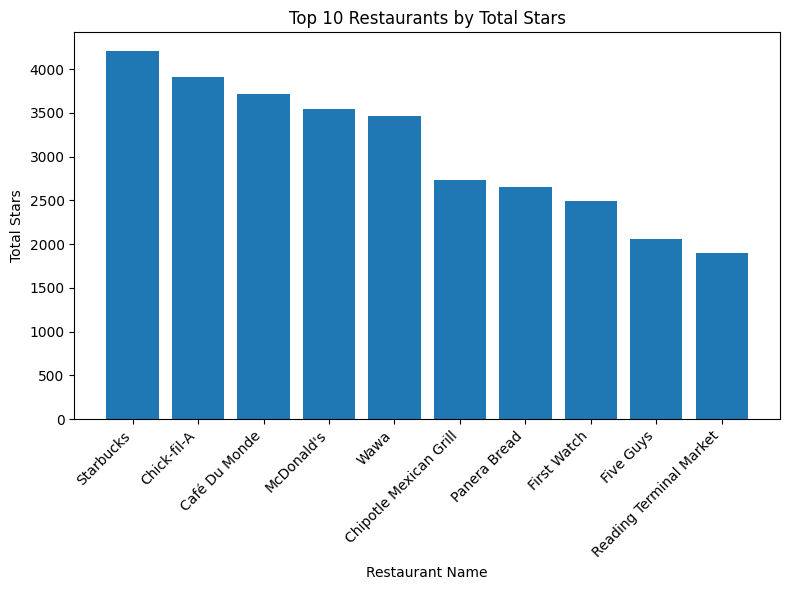

In [18]:
# Group by 'name' and calculate the total stars for each restaurant
total_stars_by_name = restaurant_df.groupby('name')['stars'].sum()

# Sort the restaurants by total stars in descending order
top_10_restaurants = total_stars_by_name.sort_values(ascending=False).head(10)

# Plot the top 10 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_10_restaurants.index, top_10_restaurants.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Stars')
plt.title('Top 10 Restaurants by Total Stars')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

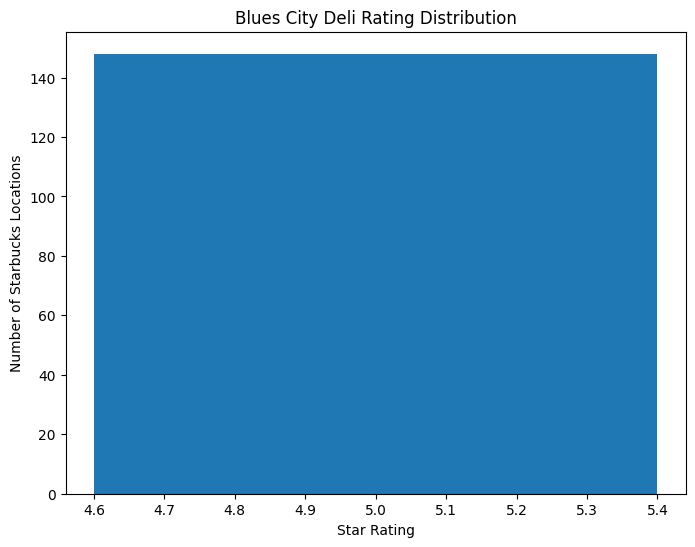

Average Blues City Deli Rating: 5.00


In [19]:
# prompt: starbucks rating and plot by star

# Filter for Starbucks restaurants
blues_df = restaurant_df[restaurant_df['name'].str.contains('Blues City Deli', na=False)]

# Group by star rating and count the number of Starbucks locations
blues_by_star = blues_df.groupby('stars')['name'].count()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(blues_by_star.index, blues_by_star.values)
plt.xlabel('Star Rating')
plt.ylabel('Number of Starbucks Locations')
plt.title('Blues City Deli Rating Distribution')
plt.show()

# Display the average star rating for Starbucks
average_starbucks_rating = blues_df['stars'].mean()
print(f"Average Blues City Deli Rating: {average_starbucks_rating:.2f}")


Total unique restaurant names with 5 stars: 802


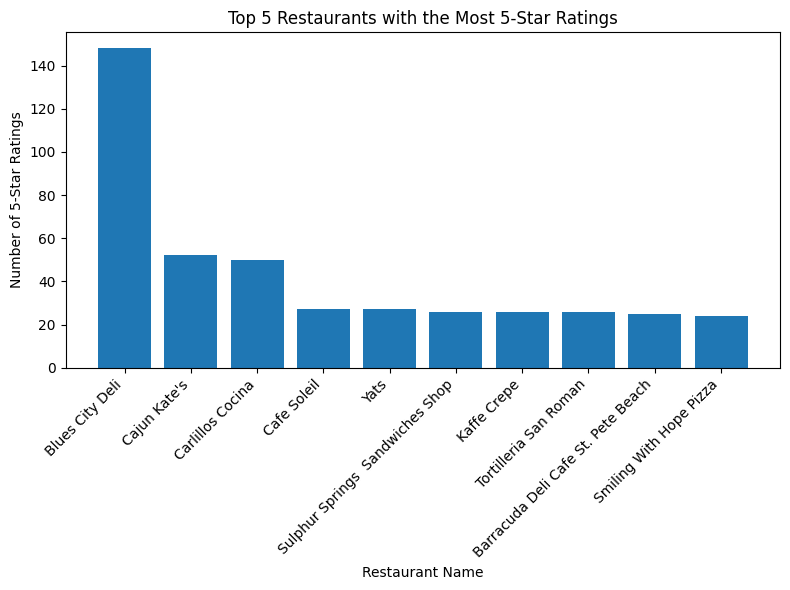

In [20]:
# Filter the DataFrame for restaurants with 5 stars
five_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_five_star_names = five_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 5 stars: {unique_five_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_five_star_restaurants = five_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_five_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 5-Star Ratings")
plt.title("Top 5 Restaurants with the Most 5-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total unique restaurant names with 4 stars: 10180


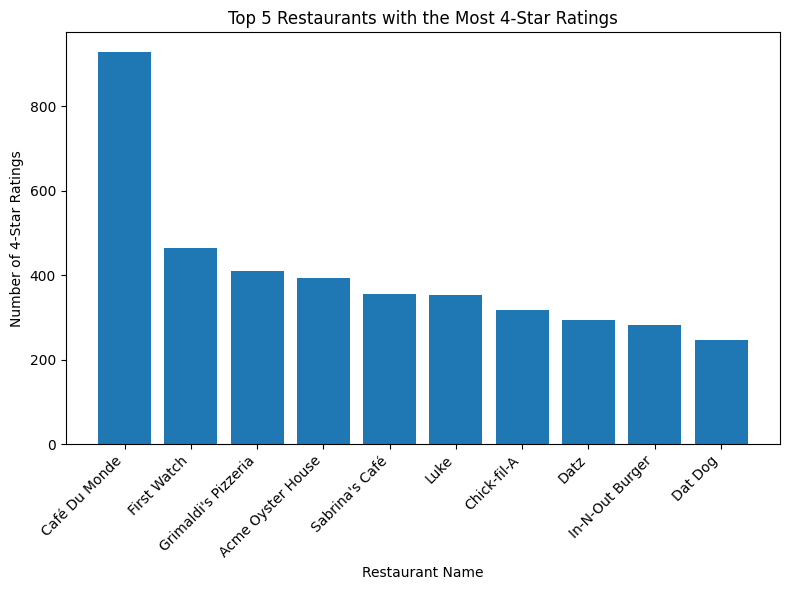

In [21]:
# Filter the DataFrame for restaurants with 4 stars
four_star_restaurants = restaurant_df[restaurant_df['stars'] == 4]

# Count the unique restaurant names with 4 stars
unique_four_star_names = four_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 4 stars: {unique_four_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_four_star_restaurants = four_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_four_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 4-Star Ratings")
plt.title("Top 5 Restaurants with the Most 4-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


distribution of stars by star rating count

Total unique restaurant names with 3 stars: 802


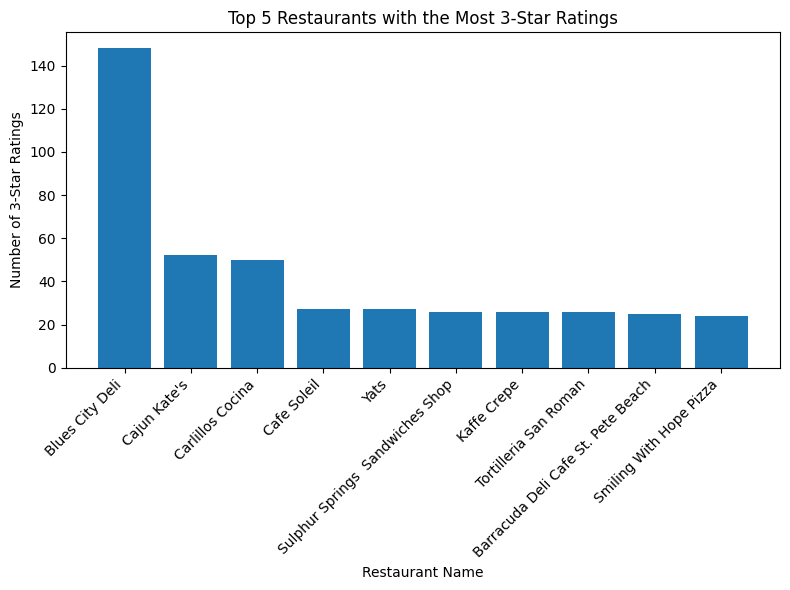

In [22]:
# Filter the DataFrame for restaurants with 3 stars
three_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_three_star_names = three_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 3 stars: {unique_three_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_three_star_restaurants = three_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_three_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 3-Star Ratings")
plt.title("Top 5 Restaurants with the Most 3-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total unique restaurant names with 2 stars: 802


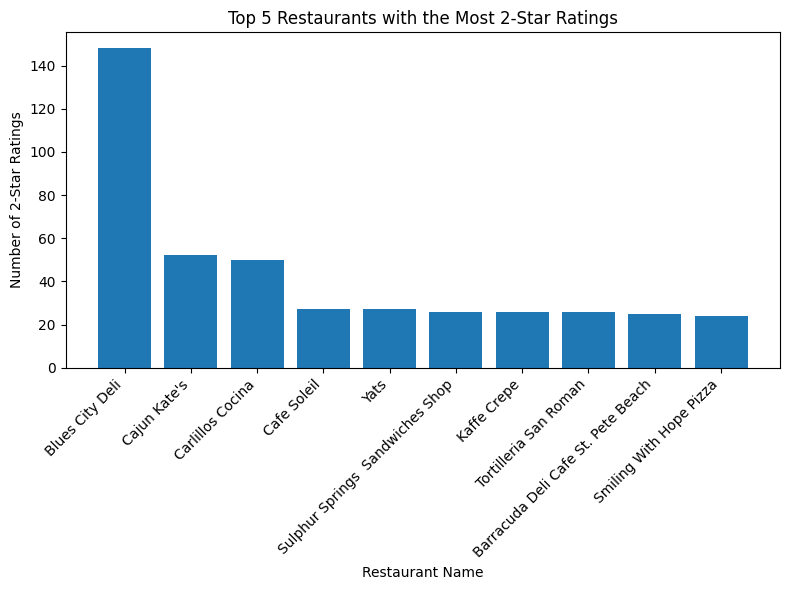

In [23]:
# Filter the DataFrame for restaurants with 2 stars
two_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_two_star_names = two_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 2 stars: {unique_two_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_two_star_restaurants = two_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_two_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 2-Star Ratings")
plt.title("Top 5 Restaurants with the Most 2-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Total unique restaurant names with 1 stars: 802


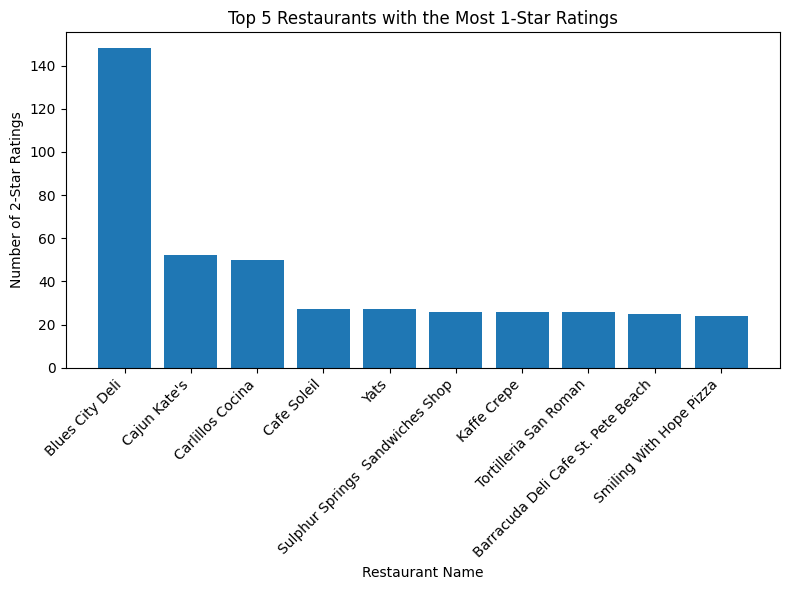

In [24]:
# Filter the DataFrame for restaurants with 1 stars
one_star_restaurants = restaurant_df[restaurant_df['stars'] == 5]

# Count the unique restaurant names with 5 stars
unique_one_star_names = one_star_restaurants['name'].nunique()
print(f"Total unique restaurant names with 1 stars: {unique_one_star_names}")

# Group by 'name' and count occurrences, then sort in descending order
top_one_star_restaurants = one_star_restaurants.groupby('name')['stars'].count().sort_values(ascending=False)

# Get the top 5 restaurants
top_5_restaurants = top_two_star_restaurants.head(10)

# Create a histogram of the top 5 restaurants
plt.figure(figsize=(8,6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of 2-Star Ratings")
plt.title("Top 5 Restaurants with the Most 1-Star Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


no  of hotels per state
no of stars per state

In [25]:
# plot  name vs c and location with high stars, top hotels in top 5 location


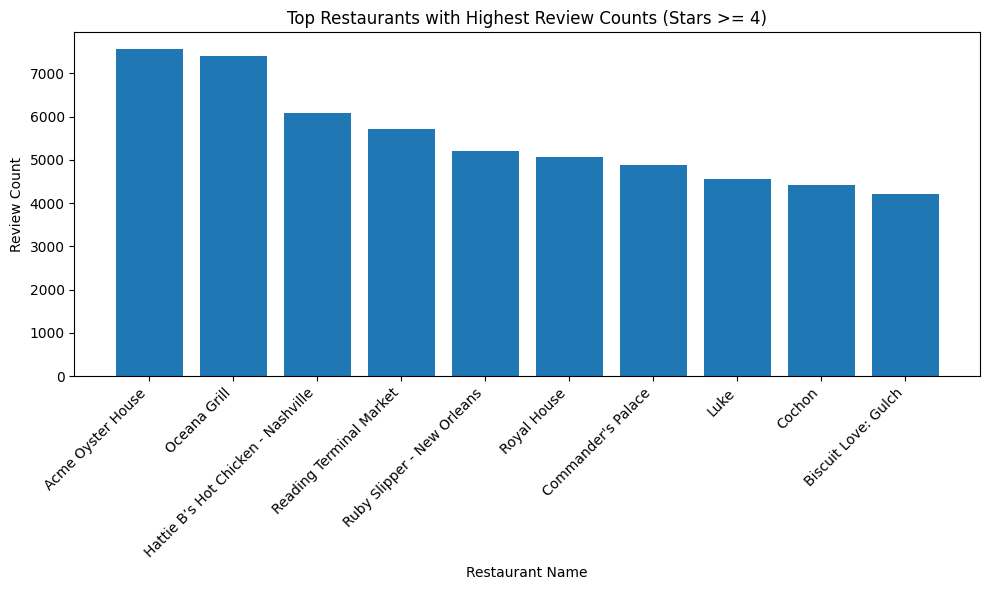

                                    review_count  \
name                                               
Acme Oyster House                           7568   
Oceana Grill                                7400   
Hattie B’s Hot Chicken - Nashville          6093   
Reading Terminal Market                     5721   
Ruby Slipper - New Orleans                  5193   
Royal House                                 5070   
Commander's Palace                          4876   
Luke                                        4554   
Cochon                                      4421   
Biscuit Love: Gulch                         4207   

                                                                  Location  
name                                                                        
Acme Oyster House                         Metairie, LA, 3000 Veterans Blvd  
Oceana Grill                                 New Orleans, LA, 739 Conti St  
Hattie B’s Hot Chicken - Nashville           Nashville, TN, 112 19t

In [26]:
# prompt: name vs c and location

# Assuming you want to plot restaurant name, review count, and location for restaurants with high star ratings.
# You can adjust the filtering criteria as needed.

high_rated_restaurants = restaurant_df[restaurant_df['stars'] >= 4]  # Filter for restaurants with 4 or more stars

# Group by name and get the maximum review count and location
grouped_restaurants = high_rated_restaurants.groupby('name').agg({'review_count': 'max', 'Location': 'first'})

# Sort by review count (you can also sort by stars or other criteria)
sorted_restaurants = grouped_restaurants.sort_values('review_count', ascending=False).head(10)


# Create a bar plot for name vs review count
plt.figure(figsize=(10, 6))
plt.bar(sorted_restaurants.index, sorted_restaurants['review_count'])
plt.xlabel('Restaurant Name')
plt.ylabel('Review Count')
plt.title('Top Restaurants with Highest Review Counts (Stars >= 4)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Create a plot to show locations (if it's feasible to visualize many locations)
# You can consider using a scatter plot with location coordinates (if you have them), a bar chart with top locations, or a map visualization.
# Note: Map visualization would require additional libraries (like folium or plotly).

# For example, if you have latitude and longitude:
# plt.figure(figsize=(10, 6))
# plt.scatter(high_rated_restaurants['longitude'], high_rated_restaurants['latitude'], c=high_rated_restaurants['stars'], cmap='viridis')
# plt.colorbar(label='Star Rating')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Location of High-Rated Restaurants')
# plt.show()


print(sorted_restaurants)  # Display the data used for the plot




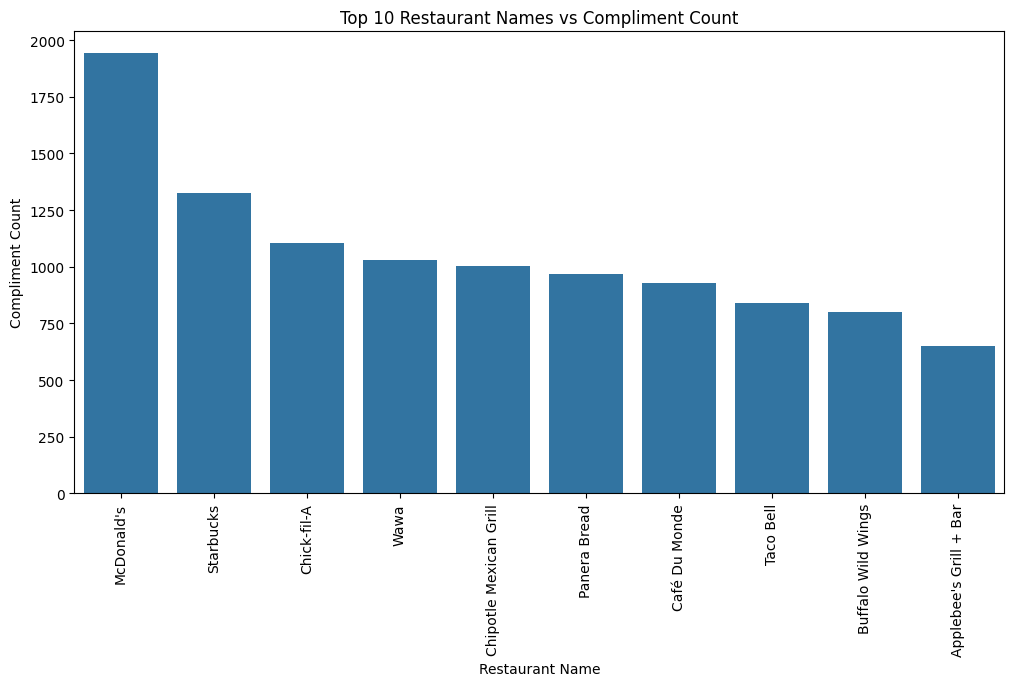

In [27]:
# plot  name vs compliment count top 10

# Group by 'name' and count the number of compliments
name_compliment_counts = restaurant_df.groupby('name')['compliment_count'].count()

# Sort the counts in descending order and take the top 10
top_10_names = name_compliment_counts.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_names.index, y=top_10_names.values)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Compliment Count')
plt.title('Top 10 Restaurant Names vs Compliment Count')
plt.show()

In [28]:
restaurant_df.columns

Index(['business_id', 'name', 'stars', 'review_count', 'attributes',
       'categories', 'user_id', 'text', 'compliment_count', 'Location'],
      dtype='object')

# **Feature Engineering**


categories standardize the spacing

# Collaborative filtering recommendation system


In [46]:
# Filter the data to focus on users with more than 10 reviews model 0
filtered_df = restaurant_df.groupby('user_id').filter(lambda x: len(x) > 10)

# Now create the user-item matrix with the filtered data
user_item_matrix = filtered_df.pivot_table(index='user_id', columns='name', values='stars', fill_value=0)
user_item_matrix.head(10)



name,#1 Mongolian BBQ - Best Stir Fried Noodles In Boise,&pizza - UPenn,&pizza - Walnut,&pizza - Willow Grove,'Merica Food Truck,'Ono Poke Co,'feine,026 Pub N Biergarten,1 In Town,10 Arts Bistro,...,the CAFÉ @ ARTpool Gallery,theory,up-RYES Bagel & Deli,vPho,yogurtree,zpizza,¡CUATRO,¡Juice!,ÀLAVITA,ā café
user_id,,,,,,,,,,,,,,,,,,,,,
--KsuCSkGGvDKTbdK9NvIg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--_H9j6ggxvqhh9nPofZwg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--u09WAjW741FdfkJXxNmg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-0H6Rm6dCi3pkFBC26HsoQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2U8X6XX1NV1mYX-2MCtKg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2nNiAnDaSbQayynsqgL6Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-4RbxLJlFZlu-KRuUiiGLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-4mjLXqAoAtQjqDFo9q9WQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-6-wZrgbre_dJj3wO3qtfQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Create a DataFrame for user similarity
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)



In [31]:
def recommend_restaurants(user_id, user_item_matrix, user_similarity_df, top_n=5):
  """
  Recommends top N restaurants for a given user based on user similarity.

  Args:
    user_id: The ID of the user for whom to generate recommendations.
    user_item_matrix: The user-item interaction matrix.
    user_similarity_df: The DataFrame containing user similarity scores.
    top_n: The number of top recommendations to return.

  Returns:
    A list of recommended restaurant names.
  """
# Check if user_id is in the index of user_similarity_df
  if user_id not in user_similarity_df.index:
    print(f"User ID {user_id} not found in the similarity matrix. Returning empty recommendations.")
    return []  # Return an empty list if user ID is not found

  # Find similar users
  similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]

  # Get restaurants the user has rated
  rated_restaurants = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()

  # Find restaurants liked by similar users but not yet rated by the target user
  recommended_restaurants = []
  for similar_user_id in similar_users.index:
    similar_user_ratings = user_item_matrix.loc[similar_user_id]
    for restaurant_name, rating in similar_user_ratings.items():
      if restaurant_name not in rated_restaurants and rating >= 4:  # Consider restaurants with high ratings
        recommended_restaurants.append((restaurant_name, rating))

  # Sort recommendations by rating (in descending order)
  recommended_restaurants.sort(key=lambda x: x[1], reverse=True)

  # Return the top N recommendations
  return [restaurant for restaurant, rating in recommended_restaurants[:top_n]]


# Get recommendations for user 'zx'
user_id_to_recommend = 'zxuxd6Hz2tKcpgZ71dYEcw'  # Replace with a valid user ID
recommendations = recommend_restaurants(user_id_to_recommend, user_item_matrix, user_similarity_df)
print(f"Top 5 recommended restaurants for user {user_id_to_recommend}: {recommendations}")


Top 5 recommended restaurants for user zxuxd6Hz2tKcpgZ71dYEcw: ['Paws The Cat Cafe', 'Sherwood Nitzza Deluxe Pizza Pasta & Donair', 'The Dosa Shop', 'Rio Vida Glutenfree Bakery & Manufacturing', 'Kobachi']


In [32]:
user_id_to_recommend = 'zz9wGVLClSDHoklHoj2g8w'  # Replace with a valid user ID
recommendations = recommend_restaurants(user_id_to_recommend, user_item_matrix, user_similarity_df)
print(f"Top 5 recommended restaurants for user {user_id_to_recommend}: {recommendations}")

Top 5 recommended restaurants for user zz9wGVLClSDHoklHoj2g8w: ["Joe's Next Door", "Sundae's Ice Cream & Coffee", 'El Mr Camaron', "Garcia's Hot Dog", 'Tlaolli']


In [33]:
# Get recommendations for user 'zu'
user_id_to_recommend = 'zu-e06_BM_TdkAZEKMrIww'  # Replace with a valid user ID
recommendations = recommend_restaurants(user_id_to_recommend, user_item_matrix, user_similarity_df)
print(f"Top 5 recommended restaurants for user {user_id_to_recommend}: {recommendations}")

Top 5 recommended restaurants for user zu-e06_BM_TdkAZEKMrIww: ['The Lucky Well - Spring Arts', "Miss Rachel's Pantry", 'Choice Beer Deli', 'Cafe Mi Quang', "Indiana Joe's"]


In [34]:
# prompt: accuracy score using cross evaluation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Assuming you have a 'user_item_matrix' and you want to use KNN for recommendation
# 1. Prepare your data:
# - X: User-item matrix (features)
# - y: Some target variable representing whether a user liked a restaurant or not (labels)

# Example: Consider restaurants with stars >= 4 as liked (you can adjust the threshold)
y = (user_item_matrix.mean(axis=1) >= 4).astype(int)
X = user_item_matrix.values


# 2. Choose a model (KNN in this example)
model = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed

# 3. Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# 4. Print the average accuracy and standard deviation
print(f"Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Note:
# We will need to adjust the model, features, or the target variable (y) to improve the accuracy.




Accuracy: 1.00 (+/- 0.00)


The model is over fitting, so we try another model 1 using SVD.

In [35]:
# Import necessary modules for model1
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Load data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(restaurant_df[['user_id', 'name', 'stars']], reader)
# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Predict and evaluate using RMSE
predictions = svd_model.test(testset)
rmse(predictions)

RMSE: 0.3134


0.3134039159485988

In [36]:
 # Evaluate the model using accuracy score

from sklearn.metrics import accuracy_score

def evaluate_accuracy_surprise(predictions, threshold=4):
    """
    Evaluates the accuracy of predictions made by a Surprise model.

    Args:
        predictions: A list of Prediction objects from Surprise.
        threshold: The rating threshold for considering a prediction as a "like."

    Returns:
        The accuracy score.
    """
    y_true = [(pred.r_ui >= threshold) for pred in predictions]
    y_pred = [(pred.est >= threshold) for pred in predictions]
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Evaluate accuracy using the Surprise model's predictions
accuracy_surprise = evaluate_accuracy_surprise(predictions)
print(f"Accuracy (Surprise Model): {accuracy_surprise}")


Accuracy (Surprise Model): 0.6842470035061017


In [37]:
def get_user_recommendations(user_id, user_similarity_df, user_item_matrix, num_recommendations=5):
    """
    Gets recommendations for a user based on cosine similarity.

    Args:
        user_id: The ID of the user for whom to generate recommendations.
        user_similarity_df: DataFrame containing user-user similarity scores.
        user_item_matrix: DataFrame representing user-item ratings.
        num_recommendations: The number of recommendations to generate.

    Returns:
        A Series containing the top recommendations for the user.
    """
    # Check if user_id is in the index
    if user_id not in user_similarity_df.index:
        print(f"User ID '{user_id}' not found in the data.")
        return None  # or raise an exception if preferred

    # Get similar users
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False)

    # Get the items rated by similar users
    similar_users_items = user_item_matrix.loc[similar_users.index]

    # Calculate the weighted scores for each item
    weighted_scores = similar_users_items.T.dot(similar_users)

    # Remove items the user has already rated
    weighted_scores = weighted_scores[user_item_matrix.loc[user_id, :].fillna(0) == 0]

    # Get the top recommendations
    return weighted_scores.nlargest(num_recommendations)

# Example: Get recommendations for a specific user ID
# Assuming 'U1001' is a valid user ID in your data
recommendations = get_user_recommendations('zz9wGVLClSDHoklHoj2g8w',user_similarity_df, user_item_matrix)
print("\nRecommendations for zz9wGVLClSDHoklHoj2g8w:")
print(recommendations)


Recommendations for zz9wGVLClSDHoklHoj2g8w:
name
Yats                         8.049215
Chick-fil-A                  6.522586
Starbucks                    6.134102
Chipotle Mexican Grill       5.587710
Jockamo Upper Crust Pizza    5.302177
dtype: float64


In [38]:
#Testing the model1
recommendations = get_user_recommendations('ztj0Iln1_ahMyDu9WXQNeA', user_similarity_df, user_item_matrix)
print("\nRecommendations for ztj0Iln1_ahMyDu9WXQNeA:")
print(recommendations)


Recommendations for ztj0Iln1_ahMyDu9WXQNeA:
name
Wawa                        1.177869
Smashburger                 1.060200
Uno Pizzeria & Grill        0.893880
Marino's of Mullica Hill    0.886144
Thai Son                    0.851982
dtype: float64


# **Content based recommendation system**

In [40]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
from nltk.tokenize import word_tokenize

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to tokenize and lemmatize text
def lemmatize_text(text):
    words = word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Join lemmatized words back into a single string

# Apply lemmatization to the review_text column
restaurant_df['lemmatized_review'] = restaurant_df['text'].apply(lemmatize_text)

# Display the dataset with lemmatized review texts
print(restaurant_df[['text', 'lemmatized_review']])

                                                     text  \
8                         Love their pastries and drinks!   
9       Really good egg tart and bubble tea.  Best we ...   
10      Was told they stopped making almond tarts... U...   
11                       After 6 pm the bread is on sale!   
12                    Best steamed pork bun in chinatown!   
...                                                   ...   
530740  If there is a long line in the drive thru just...   
530741  Amazing Dutch Bros site!!!   Haven't had a bad...   
530785                                    Al Pastor Tacos   
530788  Located in Grange Centre 1 minute off of white...   
530789  Consider getting a rice plate, instead. They g...   

                                        lemmatized_review  
8                           love their pastry and drink !  
9       really good egg tart and bubble tea . best we ...  
10      wa told they stopped making almond tart ... un...  
11                      aft

In [42]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the lemmatized review text into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(restaurant_df['lemmatized_review'])

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (367927, 51927)


In [43]:
# Calculate the cosine similarity between restaurants based on lemmatized text
#cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the similarity matrix
#print("Cosine Similarity Matrix:")
#print(cosine_sim)

In [44]:
# Define batch size for chunk processing
batch_size = 1000 #try 50,100,

# Initialize an empty list to store results
similarity_chunks = []

# Calculate cosine similarity in batches
for i in range(0, tfidf_matrix.shape[0], batch_size):
    cosine_sim_chunk = linear_kernel(tfidf_matrix[i:i + batch_size], tfidf_matrix)
    similarity_chunks.append(cosine_sim_chunk)

# Concatenate all the chunks into a single matrix
cosine_sim = np.vstack(similarity_chunks)

# Display the resulting similarity matrix shape
print("Final Cosine Similarity Matrix shape:", cosine_sim.shape)

NameError: name 'linear_kernel' is not defined

In [ ]:
# Function to get recommendations based on restaurant name
def get_recommendations(restaurant_name, cosine_sim=cosine_sim):
    # Get the index of the restaurant that matches the name
    idx = restaurant_df[restaurant_df['name'] == restaurant_name].index[0]

    # Get the similarity scores for that restaurant
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the restaurants based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar restaurants
    sim_scores = sim_scores[1:3]  # Get top 2 most similar (ignoring the first one which is itself)

    # Get the restaurant names based on indices
    restaurant_indices = [i[0] for i in sim_scores]
    return restaurant_df['name'].iloc[restaurant_indices]


In [ ]:
# Get recommendations for 'Restaurant A'
recommended_restaurants = get_recommendations('Restaurant A')
print("Recommendations for 'Restaurant A':")
print(recommended_restaurants)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import hstack

# Split categories into a list for each restaurant
restaurant_df['categories'] = restaurant_df['categories'].apply(lambda x: x.split(', '))

# Apply One-Hot Encoding to the categories
mlb = MultiLabelBinarizer()
categories_encoded = mlb.fit_transform(restaurant_df['categories'])

# Combine TF-IDF (lemmatized text) and one-hot encoded categories into a single feature matrix
combined_features = hstack([tfidf_matrix, categories_encoded])

# Calculate cosine similarity on the combined features
combined_cosine_sim = cosine_similarity(combined_features, combined_features)

# Use the same recommendation function but with combined features
def get_combined_recommendations(restaurant_name, cosine_sim=combined_cosine_sim):
    idx = restaurant_df[restaurant_df['name'] == restaurant_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Top 2
    restaurant_indices = [i[0] for i in sim_scores]
    return restaurant_df['name'].iloc[restaurant_indices]

# Get recommendations for 'Restaurant A' using combined features
combined_recommendations = get_combined_recommendations('Restaurant A')
print("Recommendations for 'Restaurant A' (combined features):")
print(combined_recommendations)

In [ ]:
 #Get content-based recommendations for a restaurant
recommendations = get_content_based_recommendations('Shree Santosh Dhaba Family Restaurant', num_recommendations=5)
print("\nContent-Based Recommendations for Shree Santosh Dhaba Family Restaurant:")
print(recommendations)
